<a href="https://colab.research.google.com/github/Zhyla01/AI_work/blob/main/homework_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
url = "https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/House_Rent_Dataset.csv"
df = pd.read_csv(url, index_col="Unnamed: 0")

***## Завдання 1***

In [3]:
print(f"Кількість рядків: {df.shape[0]}")
print(f"Кількість стовпчиків: {df.shape[1]}\n")

print("Типи даних:")
print(df.dtypes, "\n")

print("Кількість пропущених значень:")
print(df.isnull().sum())

Кількість рядків: 4746
Кількість стовпчиків: 12

Типи даних:
Posted On             object
BHK                  float64
Rent                 float64
Size                 float64
Floor                 object
Area Type             object
Area Locality         object
City                  object
Furnishing Status     object
Tenant Preferred      object
Bathroom             float64
Point of Contact      object
dtype: object 

Кількість пропущених значень:
Posted On            367
BHK                  404
Rent                 377
Size                 344
Floor                366
Area Type            356
Area Locality        399
City                 358
Furnishing Status    351
Tenant Preferred     374
Bathroom             359
Point of Contact     374
dtype: int64


***## Завдання 2***

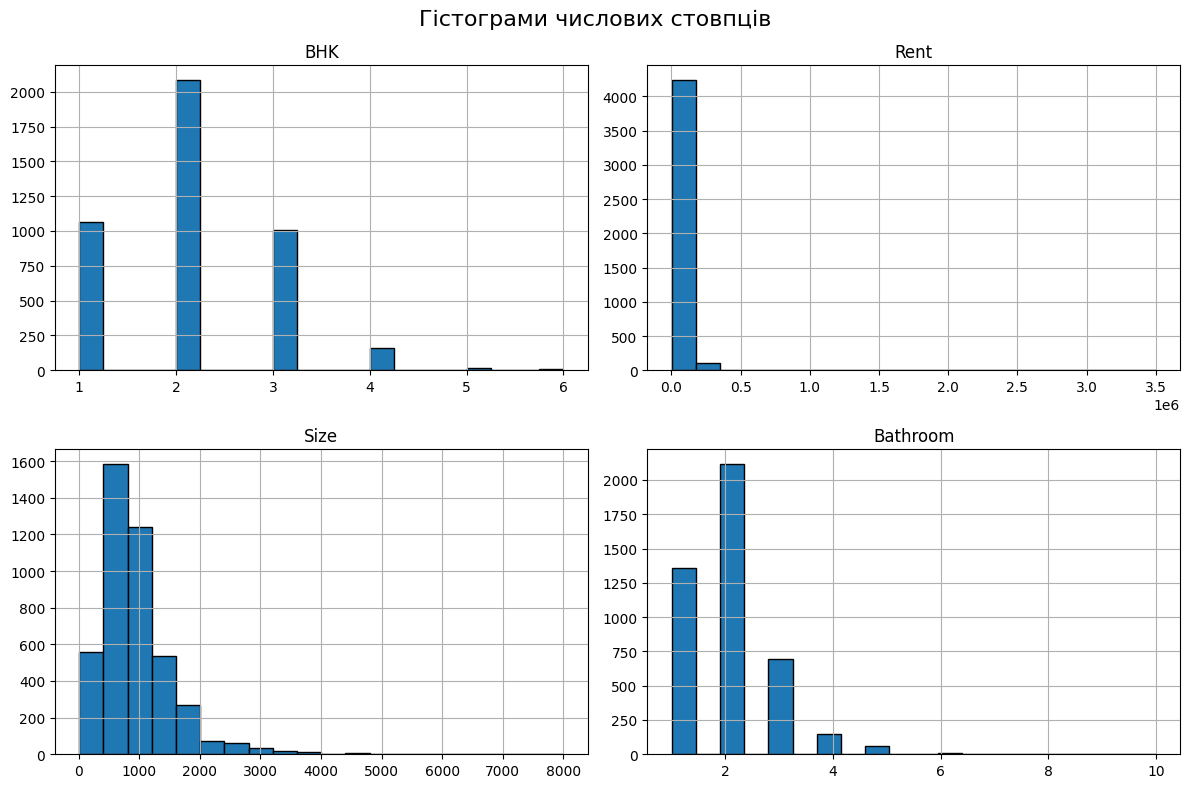

In [4]:
numeric_cols = df.select_dtypes(include=np.number).columns

df[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Гістограми числових стовпців", fontsize=16)
plt.tight_layout()
plt.show()

***## Завдання 3***

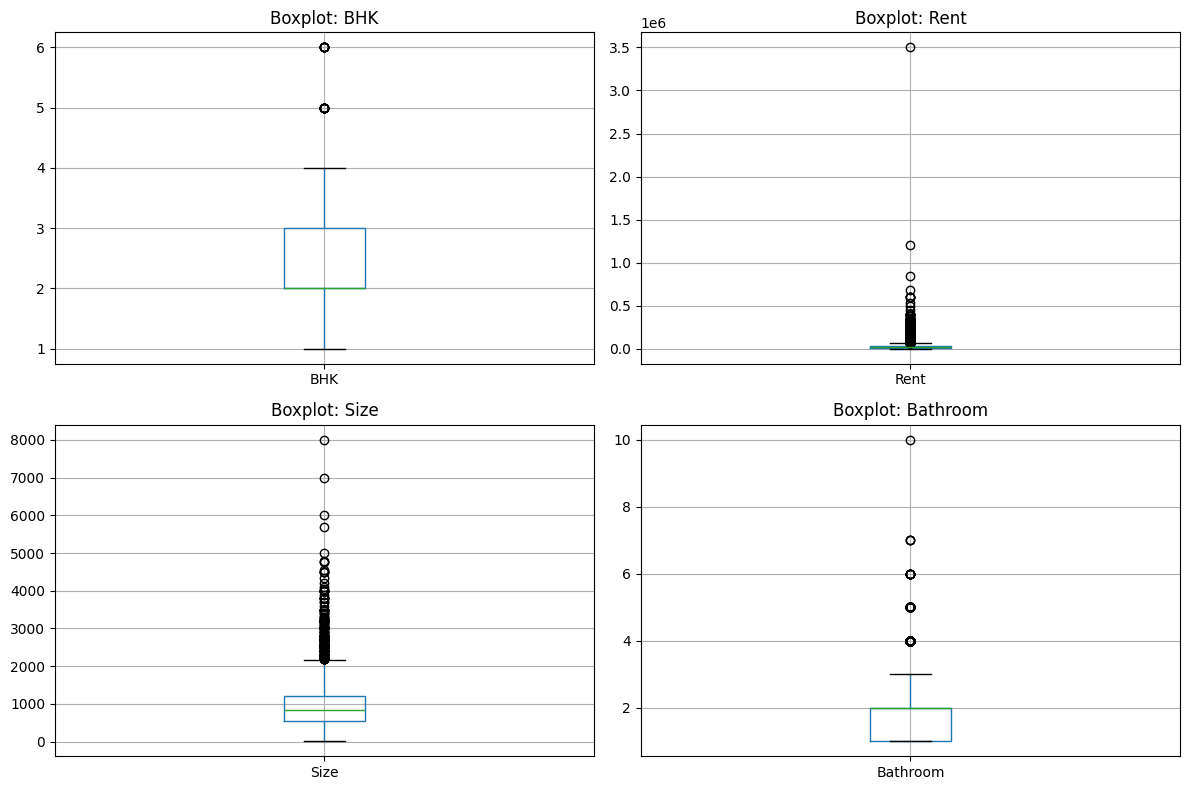


Після видалення викидів:
Розмірність: (2947, 12)


In [5]:
# Побудова boxplot'ів
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    df.boxplot(column=col)
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

# Видалення викидів (IQR)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df_cleaned = df.copy()
for col in numeric_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

print("\nПісля видалення викидів:")
print(f"Розмірність: {df_cleaned.shape}")

***## Завдання 4***

In [6]:
# Категоріальні стовпці
cat_cols = df_cleaned.select_dtypes(exclude=np.number).drop(columns=["Posted On", "Area Locality"], errors='ignore').columns

# Пайплайни
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Комбінований трансформер
preprocessor = ColumnTransformer([
    ("num", num_pipeline, numeric_cols),
    ("cat", cat_pipeline, cat_cols)
])

# Повний пайплайн
data_pipeline = Pipeline([
    ("preprocessing", preprocessor)
])

# Обробка даних
X_prepared = data_pipeline.fit_transform(df_cleaned)
print("Після pipeline, розмірність оброблених даних:", X_prepared.shape)

Після pipeline, розмірність оброблених даних: (2947, 287)
